# Visualize Hmm Results
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
xxxxxxxx

## Load merged .h5 files

In [1]:
from pySPT.widgets.widgetNotebooks import load_merged_h5
from pySPT.widgets import widgetHmmVis
from pySPT.hmm import hmmVisualization
import warnings
warnings.filterwarnings('ignore')
widget_hmm_vis = widgetHmmVis.WidgetHmmVis()
hmm_vis = hmmVisualization.HmmVisualization()
display(widget_hmm_vis.load_dir_box, widget_hmm_vis.load_dir_button)
widget_hmm_vis.load_dir_button.on_click(widget_hmm_vis.open_dir)
widget_hmm_vis.load_dir_box.observe(widget_hmm_vis.change_load_dir_box)

Text(value='path', description='Complete path', placeholder='Type something', style=DescriptionStyle(descripti…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Button(description='plot', style=ButtonStyle(), tooltip='click to plot')

Mean AIC value: 160179.403
Mean population of states: 0.06695 0.53194 0.40112  
Mean transition probabilities:
0.92053 0.02319 0.05627
0.01397 0.97580 0.01023
0.04578 0.01184 0.94238
Mean diffusion coefficients [µm²/s] 0.00000 0.12355 0.00000  


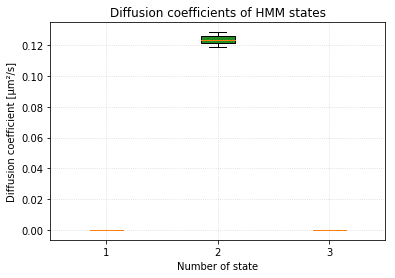

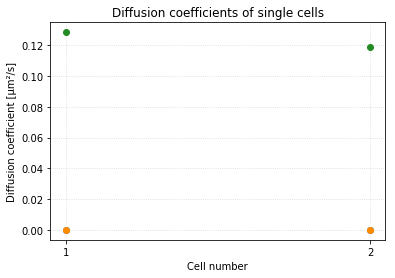

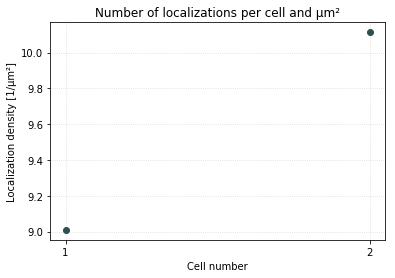

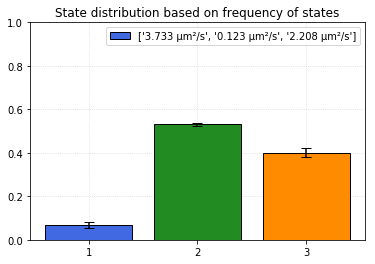

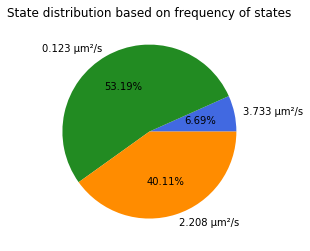

In [2]:
def event(blub):
    widget_hmm_vis.search_sub_folders(widget_hmm_vis.load_dir_box.value)
    hmm_vis.cells = load_merged_h5(widget_hmm_vis.file_names)
    hmm_vis.run()
display(widget_hmm_vis.plot_button)
widget_hmm_vis.plot_button.on_click(event)

In [3]:
display(widget_hmm_vis.save_dir_box, widget_hmm_vis.save_dir_button, widget_hmm_vis.save_folder_name_box, widget_hmm_vis.save_plots_checkbox, widget_hmm_vis.save_button)

Text(value='directory', description='Insert directory', placeholder='Type something', style=DescriptionStyle(d…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Text(value='name', description='Folder name', placeholder='Type something', style=DescriptionStyle(description…

Checkbox(value=True, description='Save plots')

Button(description='save', style=ButtonStyle(), tooltip='click to save')

In [4]:
# import math
# import numpy as np
# from graphviz import Digraph
# min_node_size = 1.5
# mult_with_node_size = min_node_size / min(hmm_vis.states_percentages) # label are too large for node, the smallest % has to fit in the node
# edge_fontsize = "10"
# dot = Digraph(comment="State Transition Diagram")
# float_precision = "%.3f"

# var_width = True
# colored_edges = True
# mean_diff_rounded = [str(hmm_vis.tp_percentage_rounded(x)) for x in hmm_vis.states_percentages]  # return the state % between 0-100 % 
# # A = pi * r^2 -> r = (A/pi)**0.5
# mean_diff_size = list(map(lambda x: float_precision % (float(x)*mult_with_node_size/math.pi)**(0.5), hmm_vis.states_percentages))
# print("mean_diff_size", mean_diff_size)
# print(float_precision % (0.4*mult_with_node_size/math.pi)**(0.5))
# diffusions = hmm_vis.mean_D
# diffusions = list(map(lambda x: str(float_precision % x), diffusions))  # represent D in ym^2/s with certain float precision

# for i in range(len(diffusions)):
#     dot.node(str(i+1), mean_diff_rounded[i]+"%",
#              color="black", fillcolor=hmm_vis.colour_palett_hex[i], fontcolor="black",
#              # colour_palett_rgba[i]
#              style="filled", shape="circle", fixedsize="shape", width=mean_diff_size[i], pos="0,0!")

# for row in range(np.shape(hmm_vis.mean_tps)[0]):
#     for column in range(np.shape(hmm_vis.mean_tps)[1]):
#         #label_name = " " + mean_tp_str[column][row][:float_precision_np]
#         label_name = " " + str(hmm_vis.tp_percentage_rounded(hmm_vis.mean_tps[column][row]))+"%"
#         tp = hmm_vis.mean_tps[row][column]

#         dot.edge(str(column+1), str(row+1), label=" "+label_name,
#                  color=(hmm_vis.gv_edge_color_gradient(hmm_vis.colour_palett_hex[column], hmm_vis.colour_palett_hex[row], 25) if colored_edges else "black"),
#                  fontsize=edge_fontsize, style="filled", penwidth=(str(hmm_vis.tp_px_mapping(tp)) if var_width else "1"))
# dot